In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [2]:
print("generating sample data with more features...")
X, y_true = make_blobs(n_samples=300, centers=4, n_features=3, cluster_std=0.60, random_state=0)



generating sample data with more features...


In [3]:

print("scaling all features to have equal importance...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



scaling all features to have equal importance...


In [4]:
print("finding best number of clusters using elbow method...")
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)


finding best number of clusters using elbow method...


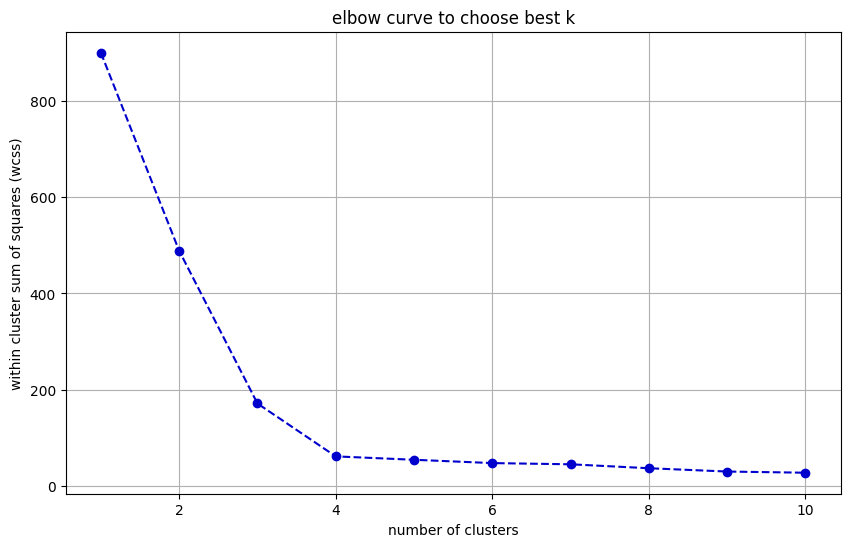

In [5]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='mediumblue')
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of squares (wcss)')
plt.title('elbow curve to choose best k')
plt.grid(True)
plt.show()




In [6]:

print("choosing k = 4 as the optimal number of clusters...")
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

choosing k = 4 as the optimal number of clusters...


visualizing clustering on first two features...


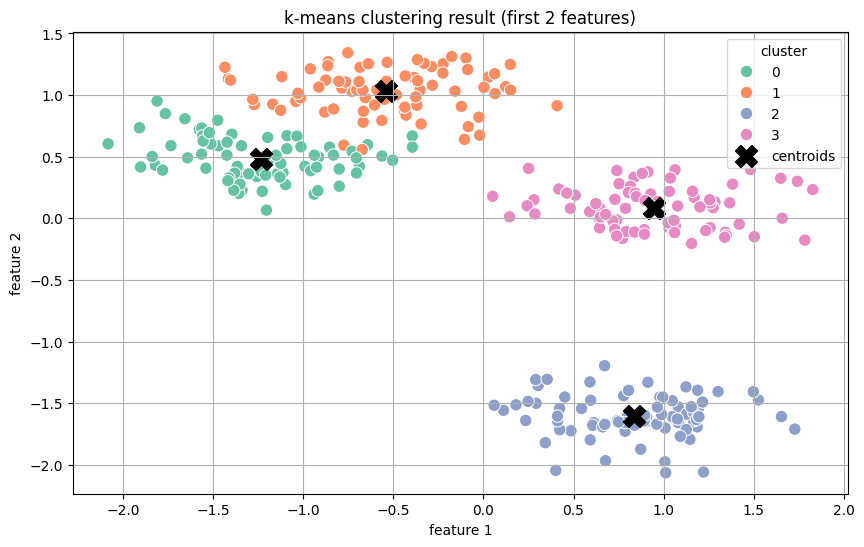

clustering done successfully :)


In [7]:
print("visualizing clustering on first two features...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='Set2', s=80)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=250, marker='X', label='centroids')
plt.title('k-means clustering result (first 2 features)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(title='cluster')
plt.grid(True)
plt.show()

print("clustering done successfully :)")